In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [228]:
studyCafe_Count_df = pd.read_csv('studyCafe_Counts.csv', header='infer', thousands = ',', encoding='ms949')
studyCafe_Count_df
    

,기간,자치구,계,학교교과교습학원,평생직업교육학원,열람실수
0,2015,합계,1067,863,204,4537
1,2016,합계,1080,876,204,7532
2,2017,합계,1133,938,195,8954
3,2018,합계,1183,966,217,9206
4,2019,합계,1184,963,221,9271


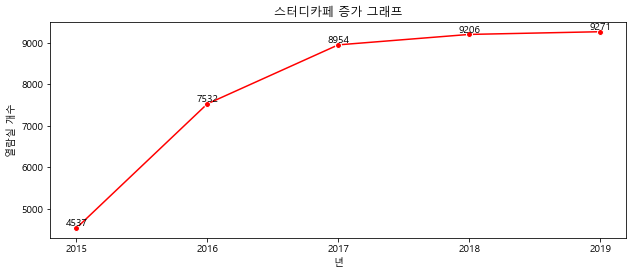

In [249]:
fig0 = plt.figure(figsize=(8,3))
axes0 = fig0.add_axes([0,0,1,1])             # Left, Bottom, Width, Height
axes0.plot(studyCafe_Count_df['기간'],studyCafe_Count_df['열람실수'],color='red',linestyle='-', marker='o',markeredgecolor='white')
for i, v in enumerate(studyCafe_Count_df['기간']):
    plt.text(v, studyCafe_Count_df['열람실수'][i], studyCafe_Count_df['열람실수'][i],                 
             fontsize = 10, 
             color='black',
             horizontalalignment='center', 
             verticalalignment='bottom')    
axes0.set_xlabel('년')
axes0.set_ylabel('열람실 개수')
axes0.set_xticks([2015,2016,2017,2018,2019])
axes0.set_title('스터디카페 증가 그래프')
plt.show()


In [2]:
df = pd.read_csv('com_v4.csv', header='infer', encoding='ms949')

In [3]:
gu = []
for i in df['주소']:
    gu += [i.split()[1]]

In [4]:
df['gu'] = gu

In [158]:
unique_df = df.drop_duplicates(['주소'])
unique_df = unique_df.reset_index(drop=True)

In [8]:
#인터넷 자료
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [160]:
my_data = pd.DataFrame(data=unique_df['gu'].value_counts())
my_data['구'] = my_data.index
my_data = my_data.reset_index().drop(['index'], axis=1)
my_data.columns = ['스터디카페 수', '구']
my_data.head()

,스터디카페 수,구
0,82,강남구
1,81,송파구
2,72,양천구
3,56,노원구
4,46,서초구


In [159]:
my_data = my_data[['구','스터디카페 수']]
my_data.sort_values(by=['구'], inplace=True)
my_data.head()

,구,스터디카페 수
0,강남구,82
6,강동구,42
20,강북구,13
5,강서구,43
14,관악구,21


In [ ]:
import folium
from folium.features import DivIcon

In [156]:
#구 이름 표시용 Dictionary
region_dict = {'강남구' : [37.49, 127.06], 
               '강동구' : [37.555300, 127.132598], 
               '강북구' : [37.640052, 127.002673] ,
               '강서구' : [37.563882, 126.815514],
               '관악구' : [37.471988, 126.934978],
               '광진구' : [37.548852, 127.078660],
               '구로구' : [37.500527, 126.836411],
               '금천구' : [37.468432, 126.888906],
               '노원구' : [37.654326, 127.061862],
               '도봉구' : [37.672070, 127.022834],
               '동대문구' : [37.584523, 127.038372],
               '동작구' : [37.503512, 126.943],
               '마포구' : [37.560127, 126.899029],
               '서대문구' : [37.580042, 126.914106],
               '서초구' : [37.483089, 127.003897],
               '성동구' : [37.553946, 127.032939],
               '성북구' : [37.604500, 127.007211],
               '송파구' : [37.512988, 127.094493],
               '양천구' : [37.522934, 126.842832],
               '영등포구' : [37.527228, 126.898391],
               '용산구' : [37.535825, 126.968607],
               '은평구' : [37.616826, 126.913415],
               '종로구' : [37.585672, 126.970878],
               '중구' : [37.562912, 126.987041],
               '중랑구' : [37.600485, 127.082891]}
region_dict

{'강남구': [37.49, 127.06],
 '강동구': [37.5553, 127.132598],
 '강북구': [37.640052, 127.002673],
 '강서구': [37.563882, 126.815514],
 '관악구': [37.471988, 126.934978],
 '광진구': [37.548852, 127.07866],
 '구로구': [37.500527, 126.836411],
 '금천구': [37.468432, 126.888906],
 '노원구': [37.654326, 127.061862],
 '도봉구': [37.67207, 127.022834],
 '동대문구': [37.584523, 127.038372],
 '동작구': [37.503512, 126.943],
 '마포구': [37.560127, 126.899029],
 '서대문구': [37.580042, 126.914106],
 '서초구': [37.483089, 127.003897],
 '성동구': [37.553946, 127.032939],
 '성북구': [37.6045, 127.007211],
 '송파구': [37.512988, 127.094493],
 '양천구': [37.522934, 126.842832],
 '영등포구': [37.527228, 126.898391],
 '용산구': [37.535825, 126.968607],
 '은평구': [37.616826, 126.913415],
 '종로구': [37.585672, 126.970878],
 '중구': [37.562912, 126.987041],
 '중랑구': [37.600485, 127.082891]}

In [157]:
my_map = folium.Map(location=[37.56, 126.982], tile='Steam Terrian',zoom_start=11)         # [경도, 위도]
folium.Choropleth(geo_data=state_geo,
                  data=unique_df['gu'].value_counts(),
                  fill_opacity=0.2,fill_color='BuPu',
                  key_on='feature.properties.name',legend_name="카페 수").add_to(my_map)

#스터디카페 위치 표시
for i in unique_df['경위도']:
    try:
        a = i.split(',')
    except:
        a = ''
    if a != '':
        folium.Circle([a[1], a[0]],
                      color='blue').add_to(my_map)
#각 구역 별 이름 표시
for key, val in region_dict.items():
    folium.map.Marker(
    val,
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt; font-weight: bold">'+key+'</div>',
        )
    ).add_to(my_map)
my_map 

In [21]:
from sklearn.preprocessing import MinMaxScaler

#각 구역 스터디카페 비율
my_columns = ['스터디카페 수']
my_scaler = MinMaxScaler()
X_scaled = my_scaler.fit_transform(my_data[my_columns])
my_data_scaled = pd.DataFrame(data=X_scaled, columns = my_columns, index = my_data['구'])

,스터디카페 수
구,
강남구,1.000000
송파구,0.987179
양천구,0.871795
노원구,0.666667
서초구,0.538462
강서구,0.500000
강동구,0.487179
광진구,0.397436
성북구,0.384615


In [34]:
my_map = folium.Map(location=[37.56, 126.982], tile='Steam Terrian', zoom_start=11)         # [경도, 위도]
folium.Choropleth(geo_data=state_geo,
                  data=my_data_scaled['스터디카페 수'],
                  fill_opacity=0.5,fill_color='BuPu',
                  key_on='feature.properties.name',legend_name='밀도').add_to(my_map)
#스터디카페 위치 표시
for i in unique_df['경위도']:
    try:
        a = i.split(',')
    except:
        a = ''
    if a != '':
        folium.Circle([a[1], a[0]],
                      color='blue').add_to(my_map)
#각 구역 별 이름 표시
for key, val in region_dict.items():
    folium.map.Marker(
    val,
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt; font-weight: bold">'+key+'</div>',
        )
    ).add_to(my_map)
my_map 